In [ ]:
#Note: to run this the images will need to be downloaded from the original dataset on zenodo

## load in needed packages 
import pandas as pd
import numpy as np

import imageio.v2 as imageio
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


In [3]:
# import the data set where the field data is matched with the images using deepforest
final_dataset = pd.read_csv('../Data/final_dataset.csv')

In [5]:
# here, we focus on the Floras Pluas site. To see this site as a whole, we need to look at the individual tiles 
# together. To do this, we need to order the tiles so that they print in an ordered fashion

directory = '../Data/tiles/Flora Pluas RGB'

#creating a list of the tiles
Flora_Pluas_tiles = []
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        Flora_Pluas_tiles.append(f)
        
#sorting the tiles        
Flora_Pluas_tiles = sorted(Flora_Pluas_tiles)
#the python sorted function is not sufficient for the way these files are labeled
order = [0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 1, 20, 21, 22, 23, 24, 2, 3, 4, 5, 6, 7, 8, 9]

# this list will contain the names of the tiles in the right order
FP = [None]*len(Flora_Pluas_tiles)

i = 0

for place in order:
    FP[place] = Flora_Pluas_tiles[i]
    i = i+1

#this list will contain the names of the tiles in the right order in a different format
FP_tiles = []    
    
for entry in FP:
#     print(entry.split('/'))
    FP_tiles.append(entry.split('/')[-1])

# FP_tiles

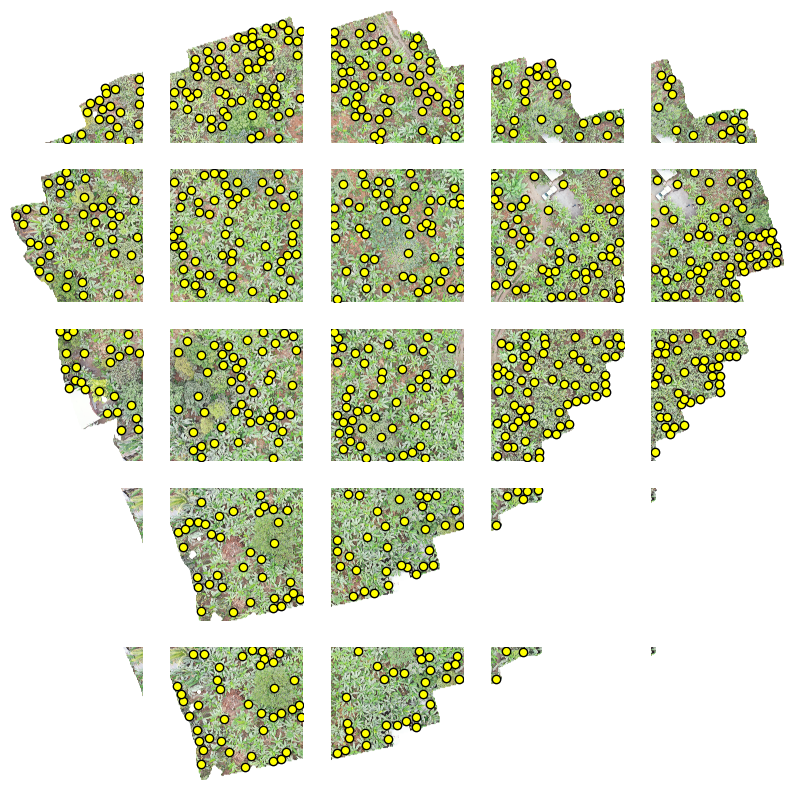

In [16]:
 ## Making a Figure
plt.figure(figsize = (10,10))

col = 1
row = 0

for i in range(len(FP_tiles)):
    
    #using the bounding boxes to find the location of the trees
    xmin_values = final_dataset.loc[final_dataset.img_path == FP_tiles[i]].xmin
    ymin_values = final_dataset.loc[final_dataset.img_path == FP_tiles[i]].ymin
    xmax_values = final_dataset.loc[final_dataset.img_path == FP_tiles[i]].xmax
    ymax_values = final_dataset.loc[final_dataset.img_path == FP_tiles[i]].ymax

    x_averages = (xmin_values+xmax_values)/2
    y_averages = (ymin_values+ymax_values)/2
    

    #print image
    plt.subplot(5,5,col + 5*row)
    im = imageio.imread(FP[i])
    plt.imshow(im)
    
    ## call plt.scatter to prinit the locations of the trees in final_dataset
    plt.scatter(x_averages, 
                y_averages,
                c='yellow',
               edgecolor = 'black') 
    
    plt.axis('off')
        
    #to make sure that the images print in the correct order    
    if (row+1)%5 == 0:
        row = 0
        col = col+1
    else: row = row +1

#display the figure    
plt.show()